In [1]:
#Antes de empezar, importo las librerias y las funciones que me van a servir para las limpiezas.
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns

# 1. Estar en movimiento en el agua puede acentuar el riesgo de ser atacado por un tiburón en el agua?

In [2]:
df_move = pd.read_csv("/Users/luissanchezdeleon/ironhack/Proyecto/Data/df_move.csv", index_col=1,encoding='latin-1')

In [3]:
df_move['RMovement'].where(~(df_move.RMovement == 1), other="less than 5 km/h", inplace=True)

In [4]:
df_move['RMovement'].where(~(df_move.RMovement == 2), other="5 to 10km/h", inplace=True)

In [5]:
df_move['RMovement'].where(~(df_move.RMovement == 3), other="more than 10km/h", inplace=True)

In [6]:
df_move.head(50)

,Country,Activity_,RMovement
Year,,,
1975,SOUTH AFRICA,attempting,less than 5 km/h
1988,SOUTH AFRICA,attempting,less than 5 km/h
2001,BRAZIL,attempting,less than 5 km/h
2011,MEXICO,attempting,less than 5 km/h
1965,BAHAMAS,attempting,less than 5 km/h
1956,AUSTRALIA,attempting,less than 5 km/h
1959,SOLOMON ISLANDS,bathing,less than 5 km/h
2012,NIGERIA,bathing,less than 5 km/h
1940,PANAMA,bathing,less than 5 km/h


In [11]:
print(df_move.shape)

(1163, 3)


<AxesSubplot:xlabel='count', ylabel='RMovement'>

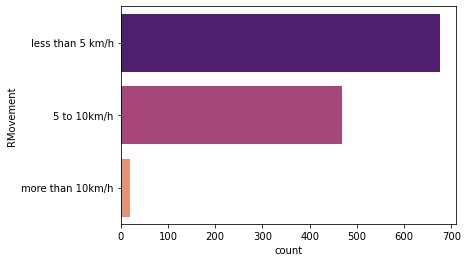

In [60]:
sns.countplot(y=df_move.RMovement, palette="magma")

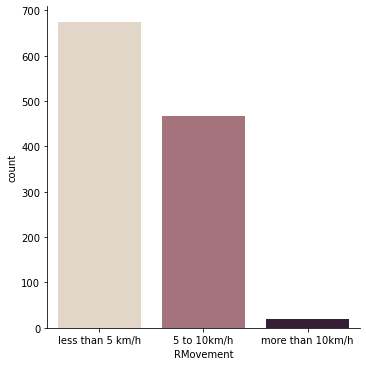

In [70]:
sns.catplot(x="RMovement", kind="count", palette="ch:.25", data=df_move)

In [12]:
df_move.RMovement.value_counts()

less than 5 km/h    675
5 to 10km/h         468
more than 10km/h     20
Name: RMovement, dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [19]:
df_move = df_move.reset_index()

### De un total de 1163 casos reportados con descripción en la actividad que estaba realizando el sujeto desde el año 1900, un total de 468 han sido contra un sujeto aparentemente en movimiento, que junto con los 20 que probablemente fuesen en barco, suman un total de 488 casos.

<AxesSubplot:xlabel='Year', ylabel='Density'>

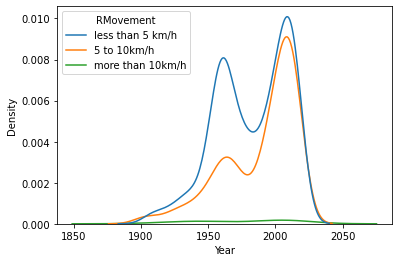

In [21]:
sns.kdeplot(x=df_move.Year, hue=df_move.RMovement)

<AxesSubplot:xlabel='Year', ylabel='Density'>

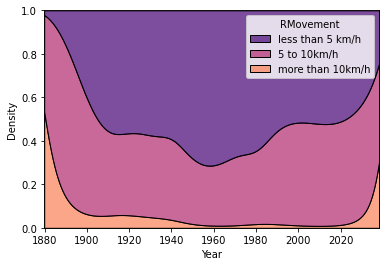

In [88]:
sns.kdeplot(x=df_move.Year, hue=df_move.RMovement, multiple="fill", palette="magma")

<AxesSubplot:xlabel='Year', ylabel='Count'>

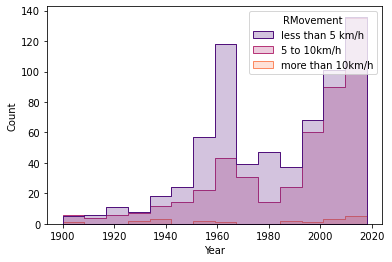

In [63]:
sns.histplot(x=df_move.Year, hue=df_move.RMovement, element="step", palette="magma")

# 2. Se puede decir que los deportes acuáticos son los que más riesgo de letalidad tienen en cuanto a ataques de tiburon se refiere?

In [27]:
df_lethal = pd.read_csv("/Users/luissanchezdeleon/ironhack/Proyecto/Data/df_lethal.csv", index_col=1,encoding='latin-1')

In [30]:
df_lethal= df_lethal.reset_index()

In [31]:
df_lethal.head(30)

,Year,Fatal,ActivityType
0,1975,N,otros
1,1988,N,otros
2,2001,U,otros
3,2011,N,otros
4,1965,N,otros
5,1956,N,otros
6,1959,Y,otros
7,2012,N,otros
8,1940,Y,otros
9,1905,N,otros


<AxesSubplot:xlabel='count', ylabel='ActivityType'>

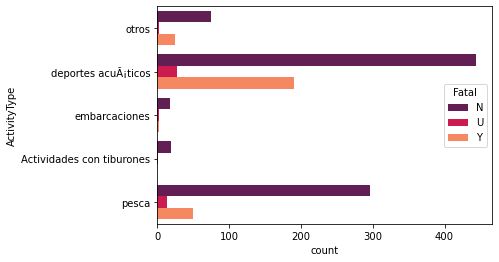

In [59]:
sns.countplot(y=df_lethal.ActivityType, hue=df_lethal.Fatal, saturation=10, palette="rocket")

<AxesSubplot:xlabel='Year', ylabel='Count'>

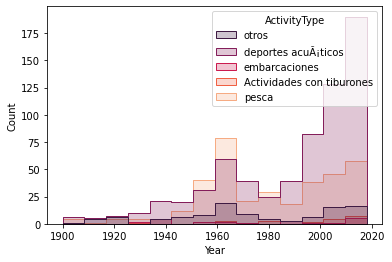

In [64]:
sns.histplot(x=df_lethal.Year, hue=df_lethal.ActivityType, element="step", palette="rocket")

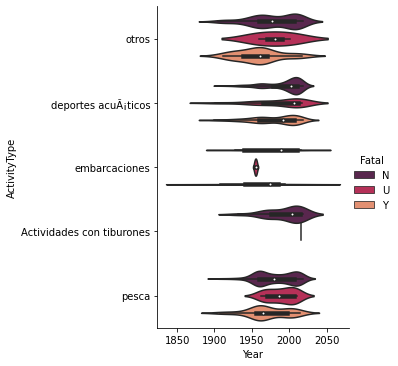

In [74]:
sns.catplot(x="Year", y="ActivityType", hue="Fatal", kind="violin", data=df_lethal, palette="rocket")

In [83]:
df_lethal['Year'] = df_lethal['Year'].astype(int)


<AxesSubplot:xlabel='Year', ylabel='ActivityType'>

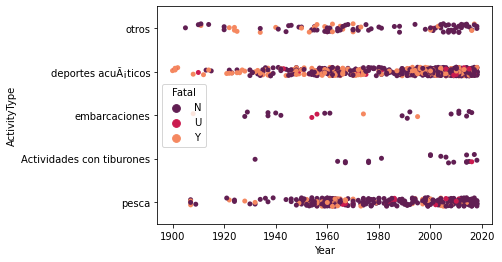

In [89]:
sns.stripplot(x="Year", y="ActivityType", hue="Fatal", data=df_lethal,palette="rocket")

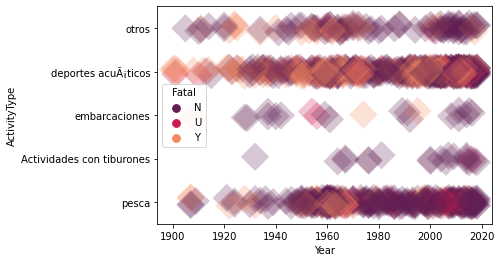

In [87]:
ax =  sns.stripplot(x="Year", y="ActivityType", hue="Fatal",
                   data=df_lethal, palette="rocket", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

# 3.En que lugares existe más posibilidad de ser atacado por un tiburón?

In [91]:
df_Country = pd.read_csv("/Users/luissanchezdeleon/ironhack/Proyecto/Data/df_Country.csv", index_col=1,encoding='latin-1')

In [93]:
df_Country = df_Country.reset_index()

In [94]:
df_Country.head()

,Fatal,Country,Year
0,N,USA,2018
1,N,USA,2018
2,N,USA,2018
3,N,AUSTRALIA,2018
4,N,MEXICO,2018


In [98]:
value_counts = df_Country['Country'].value_counts()
remote_cases = value_counts[value_counts <= 25].index
df_Country_2 = df_Country[~df_Country.Country.isin(remote_cases)]
df_Country_2["Country"].value_counts()

USA                 1711
AUSTRALIA            909
SOUTH AFRICA         453
NEW ZEALAND           78
BAHAMAS               69
BRAZIL                61
PAPUA NEW GUINEA      57
MEXICO                44
ITALY                 41
REUNION               37
MOZAMBIQUE            31
SPAIN                 27
Name: Country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Country'>

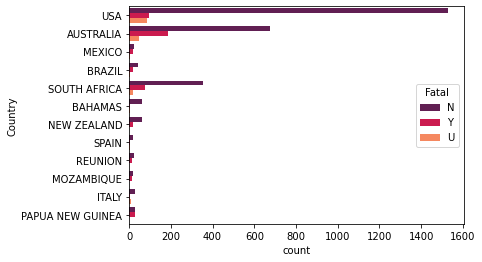

In [99]:
sns.countplot(y=df_Country_2.Country, hue=df_Country_2.Fatal, saturation=10, palette="rocket")

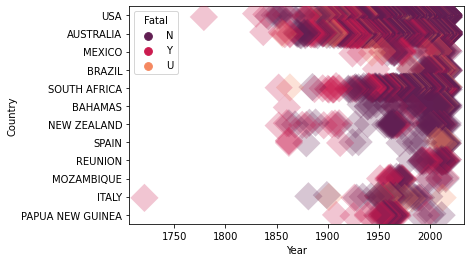

In [101]:
ax =  sns.stripplot(x="Year", y="Country", hue="Fatal",
                   data=df_Country_2, palette="rocket", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

/Users/luissanchezdeleon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'USA'

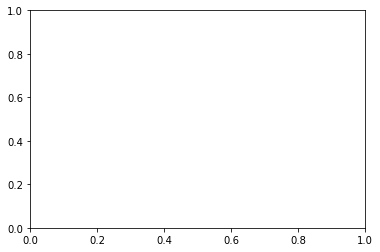